## 0.0. IMPORTS

In [1]:
import re
import nltk
import pickle
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Peres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Peres\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Peres\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## 0.1. LOADING THE DATA

In [3]:
train = pd.read_csv('train.txt', sep=';', header=None)
train.columns = ['Text', 'Sentiment']
test = pd.read_csv('test.txt', sep=';', header=None)
test.columns = ['Text', 'Sentiment']

In [4]:
train

,Text,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


In [5]:
test

,Text,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


## 0.2. FUNCTIONS

In [6]:
# Função para remover Stopwords da base.
def preprocessing(x):
    # remove pontos, virgulas,ponto e virgulas
    x = x.lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(',','').replace('!', '')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [i for i in x.split() if not i in stopwords]
    return (" ".join(palavras))

In [7]:
# Aplicando o stemming em nossa base:
def stemming(x):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in x.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

## 1.0. DATA ANALYSIS

In [8]:
train.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [9]:
test.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [10]:
train['Sentiment'].value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: Sentiment, dtype: int64

In [11]:
test['Sentiment'].value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Sentiment, dtype: int64

<AxesSubplot:>

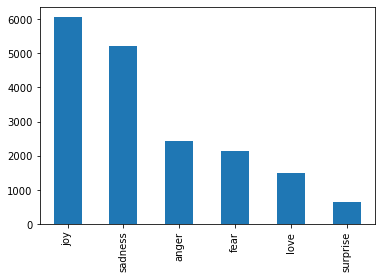

In [12]:
train['Sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:>

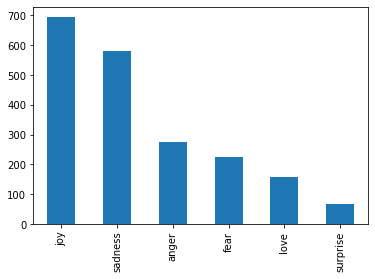

In [13]:
test['Sentiment'].value_counts().plot(kind='bar')

## 2.0. FEATURES

In [14]:
dic = {'joy': 1, 'sadness' : 2, 'anger' : 3, 'fear' : 4, 'love' : 5, 'surprise' : 6}
train['Sentiment'] = train['Sentiment'].map(dic)
test['Sentiment'] = test['Sentiment'].map(dic)

In [15]:
train['Text'] = train['Text'].apply(preprocessing)
test['Text'] = test['Text'].apply(preprocessing)

In [16]:
train['Text'] = train['Text'].apply(stemming)
test['Text'] = test['Text'].apply(stemming)

In [17]:
train['Text']

0                                    didnt feel humiliated
1        go feeling hopeles damned hopeful around someo...
2                 im grabbing minut post feel greedy wrong
3        ev feeling nostalgic fireplac know still property
4                                          feeling grouchy
                               ...                        
17995    im ssa examination tomorrow morning im quit we...
17996    constantly worry fight natur push limit inn bo...
17997                feel important sh inf experienc thing
17998    truly feel passionat enough something stay tru...
17999         feel lik wann buy cut mak see onlin even one
Name: Text, Length: 18000, dtype: object

## 3.0. MODELS

In [18]:
X_train = train['Text']
y_train = train['Sentiment']
X_test = test['Text']
y_test = test['Sentiment']

In [19]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=word_tokenize)
# Aplica o vetorizador nos dados de texto e retorna uma matriz esparsa ( contendo vários zeros):
X_train = vectorizer.fit_transform(X_train)
X_train.shape

(18000, 13725)

In [20]:
X_test = vectorizer.transform(X_test)

## 3.1. NAIVE BAYES

In [21]:
model_nv = MultinomialNB()
model_nv.fit(X_train,y_train)

MultinomialNB()

In [22]:
pred = model_nv.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.8045

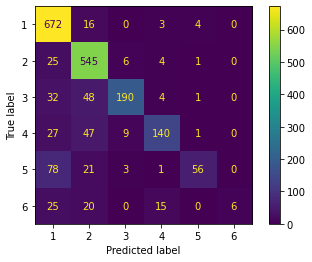

In [23]:
metrics.plot_confusion_matrix(model_nv, X_test, y_test)
plt.show();

## 3.2. SVM

In [24]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train,y_train)
predi = model_svm.predict(X_test)
metrics.accuracy_score(y_test, predi)

0.867

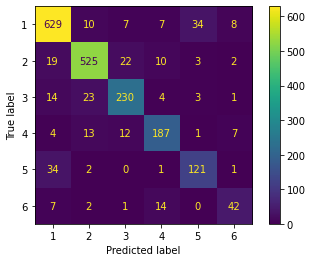

In [50]:
metrics.plot_confusion_matrix(model_svm, X_test, y_test)
plt.show();

## 3.3. CROSS VALIDATION

In [26]:
result = []
for i in range(5):
    kfold = KFold(n_splits=5, shuffle=True, random_state=i)
    clf = svm.SVC(kernel='linear')
    scores = cross_val_score(clf, X_train, y_train, cv=kfold)
    result.append(scores.mean())

In [27]:
result = pd.DataFrame(data=result, columns=['Resultado'])
result.describe()

,Resultado
count,5.000000
mean,0.873178
std,0.000361
min,0.872722
25%,0.872944
50%,0.873278
75%,0.873278
max,0.873667


In [26]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)

## 4.0. LOADING DATA FOR CLASSIFICATION

In [27]:
# carregando a base de dados
df = pd.read_csv('base_war_twitter.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Text
0,RT @Mandoline_Blue: The European parliament wi...
1,RT @ByRakeshSimha: ▶️If you supported the sava...
2,@CorbynOver @AaronBastani A war specifically b...
3,RT @piersmorgan: There’s a 40-MILE convoy of R...
4,RT @CalltoActivism: BREAKING: the Internationa...


In [38]:
df1 = df.copy()
df_final = df.copy()

In [37]:
# Função para remover Stopwords da base.
def preprocessing(x):
    # remove pontos, virgulas,ponto e virgulas
    x = re.sub(r"http\S+", "", x).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(',','').replace('!', '').replace('rt', '')
    palavras = [i for i in x.split() if not i[0] in ['@']]
    x = (" ".join(palavras))
    palavras = [i for i in x.split() if not i[0] in ['#']]
    x = (" ".join(palavras))
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [i for i in x.split() if not i in stopwords]
    return (" ".join(palavras))

In [30]:
# Aplicando o stemming em nossa base:
def stemming(x):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in x.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [39]:
df1['Text'] = df1['Text'].apply(preprocessing)
df1['Text'] = df1['Text'].apply(stemming)

In [40]:
tex = vectorizer.transform(df1['Text'])

In [41]:
df_final['Emotion'] = clf.predict(tex)

In [42]:
dic = { 1: 'joy', 2 : 'sadness', 3: 'anger', 4: 'fear', 5: 'love', 6 : 'surprise'}
df_final['Emotion'] = df_final['Emotion'].map(dic)

In [43]:
df_final.head()

,Text,Emotion
0,RT @Mandoline_Blue: The European parliament wi...,joy
1,RT @ByRakeshSimha: ▶️If you supported the sava...,anger
2,@CorbynOver @AaronBastani A war specifically b...,joy
3,RT @piersmorgan: There’s a 40-MILE convoy of R...,joy
4,RT @CalltoActivism: BREAKING: the Internationa...,anger


<AxesSubplot:>

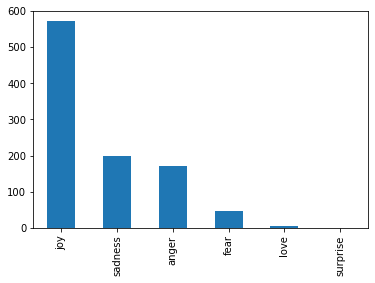

In [51]:
df_final['Emotion'].value_counts().plot(kind='bar')

In [43]:
df_final.to_excel('final-value.xlsx')

In [44]:
df_final.to_html('final-value.html')